# Code for creating figures for Aircinn 2020

- Following workflow at https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

### Imports

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy
%matplotlib inline

### Load data

In [2]:
df = pd.read_csv("../data/qcl_stylo_data_drama.csv")
df['target'] = df['Text Name'].apply(lambda x: x.split()[0])
df = df[(df['target'] == 'Plautus') | (df['target'] == 'Terence')].reset_index(drop=True)
df.head()

,Personal Pronouns,Demonstrative Pronouns,quidam,Third-Person Pronouns,iste,alius,ipse,idem,priusquam,antequam,...,Gerunds and Gerundives,cum,Conjunctions,Vocatives,Mean Sentence Length,Characters,Words,Text Name,Sentences,target
0,0.01380,0.00915,0.00004,0.00091,0.00036,0.00036,0.00019,0.00036,0.00006,0.0,...,0.00025,0.00025,0.01144,0.00000,48.07959,"47,118","9,332",Plautus Amphitruo,980,Plautus
1,0.01431,0.00793,0.00000,0.00093,0.00062,0.00049,0.00044,0.00034,0.00010,0.0,...,0.00036,0.00039,0.00954,0.00010,43.14206,"38,569","7,629",Plautus Asinaria,894,Plautus
2,0.01617,0.00896,0.00000,0.00068,0.00040,0.00028,0.00012,0.00018,0.00012,0.0,...,0.00018,0.00025,0.01105,0.00009,43.94452,"32,475","6,537",Plautus Aulularia,739,Plautus
3,0.01368,0.01016,0.00002,0.00071,0.00029,0.00027,0.00021,0.00025,0.00010,0.0,...,0.00017,0.00042,0.00995,0.00023,41.08655,"47,948","9,443",Plautus Bacchides,1167,Plautus
4,0.01527,0.01055,0.00000,0.00087,0.00058,0.00048,0.00031,0.00019,0.00005,0.0,...,0.00034,0.00031,0.01250,0.00000,51.20838,"41,530","8,297",Plautus Captivi,811,Plautus


### Build Figure 1: Principal Component Analysis on QCL Stylometric Features

In [3]:
# Define features

features = ['Personal Pronouns', 'Demonstrative Pronouns', 'quidam',
       'Third-Person Pronouns', 'iste', 'alius', 'ipse', 'idem', 'priusquam',
       'antequam', 'quominus', 'dum', 'quin', 'ut', 'Conditionals',
       'Interrogative Sentences', 'Superlatives', 'atque + Consonant',
       'Relative Clauses', 'Mean Length Relative Clauses',
       'Gerunds and Gerundives', 'cum', 'Conjunctions', 'Vocatives',
       'Mean Sentence Length']

In [4]:
# Separate features from target

x = df.loc[:, features].values
y = df.loc[:, ['target']].values
texts = [" ".join(text.split()[1:]) for text in df.loc[:, 'Text Name'].values.tolist()]

In [5]:
# Scale features

x = StandardScaler().fit_transform(x)

In [6]:
# Run principal component analysis using Scikit Learn

pca = PCA(n_components=2)
pcs = pca.fit_transform(x)

pcs_df = pd.DataFrame(data=pcs, columns=['pc1','pc2'])

In [7]:
pc1_variance, pc2_variance = np.round(pca.explained_variance_ratio_ * 100, 2)

In [8]:
# Concatenate target and principal components

pcs_df = pd.concat([df['target'], pcs_df], axis=1)

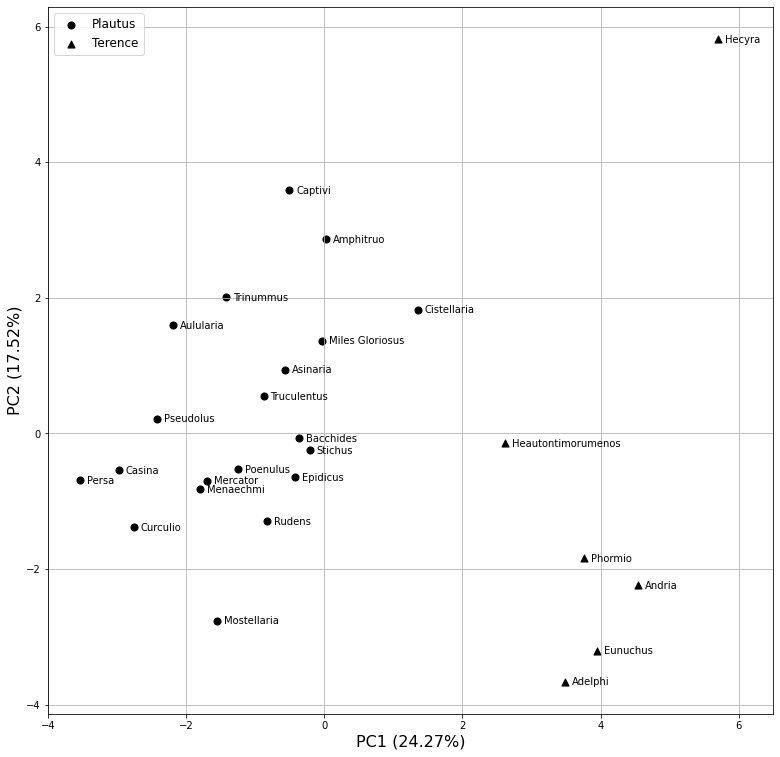

In [9]:
# Build scatterplot for Figure 1

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(f'PC1 ({pc1_variance}%)', fontsize=16)
ax.set_ylabel(f'PC2 ({pc2_variance}%)', fontsize=16)
# ax.set_title('Principal Component Analysis (n=2)', fontsize=24)
ax.set_xlim(-4, 6.5)
targets = ['Plautus', 'Terence']
markers = ['o','^']
for target, marker in zip(targets, markers):
    indicesToKeep = pcs_df['target'] == target
    ax.scatter(pcs_df.loc[indicesToKeep, 'pc1'],
               pcs_df.loc[indicesToKeep, 'pc2'],
               marker = marker,
               color = 'k',
               s = 50)
for x_, y_, t in zip(pcs_df['pc1'], pcs_df['pc2'], texts):
    ax.text(x_+.1,y_-.05,t, rotation=0)
ax.legend(targets, fontsize = 12)
ax.grid()

plt.savefig('../figures/fig_1.png', format='png', dpi=600)

### Build Figure 2: Dendrogram using QCL Stylometric Features

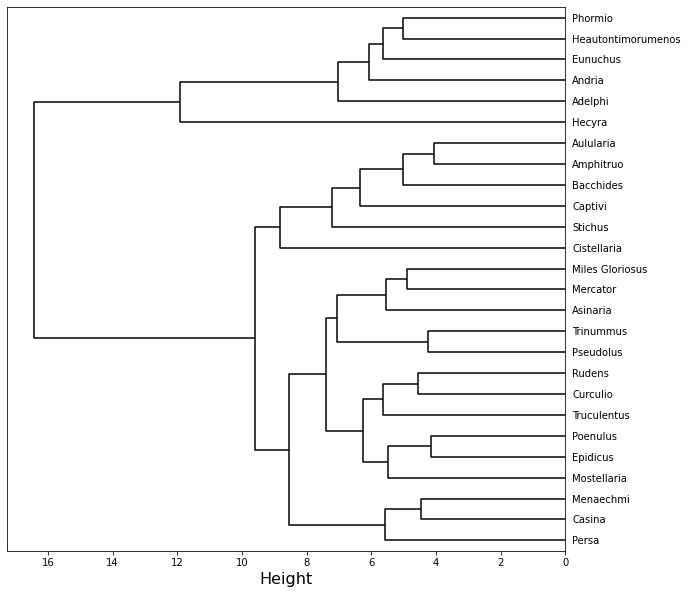

In [10]:
# Build dendrogram for Figure 2

plt.figure(figsize=(10,10))
plt.tight_layout()
plt.xlabel(f'Height', fontsize=16)
linkage = scipy.cluster.hierarchy.linkage(x, method='ward')
scipy.cluster.hierarchy.dendrogram(
    linkage,
    orientation='left',
    leaf_rotation = 0,
    labels=texts,
    color_threshold=1,
    above_threshold_color='k'
    );

plt.savefig('../figures/fig_2.png', format='png', dpi=600, bbox_inches = "tight")